In [5]:
import warnings
warnings.filterwarnings('ignore')

# Eigenvector 구하기 (고유 분해)
고유값과 고유벡터를 찾는 작업을 eigen decomposition이라고도 한다.

In [12]:
import numpy as np

In [14]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(A)

B= np.array([[3,2],[2,3]])
apple,banana = np.linalg.eig(B)
display(apple, banana)
np.sum(banana**2,axis=0)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([5., 1.])

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

array([1., 1.])

> `numpy.linalg` 라이브러리의 `eig` 사용

numpy에서 고유벡터는 행이 아닌, **열을 고유벡터로 가진다.**

In [8]:
np.linalg.eig(A)

(array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15]),
 array([[-0.23197069, -0.78583024,  0.40824829],
        [-0.52532209, -0.08675134, -0.81649658],
        [-0.8186735 ,  0.61232756,  0.40824829]]))

## 1. Eigenvector는 unit vector이다. (크기가 1인 단위 벡터)

In [9]:
eigen_val, eigen_vec = np.linalg.eig(A)
eigen_vec ** 2

array([[0.0538104 , 0.61752916, 0.16666667],
       [0.2759633 , 0.00752579, 0.66666667],
       [0.6702263 , 0.37494504, 0.16666667]])

In [10]:
# 각 vector의 길이가 1이다.
np.sum(eigen_vec ** 2, axis=0)

array([1., 1., 1.])

## 2. Eigenvector는 Symmetric matrix 일 때만 orthogonal 하다.

In [11]:
# A는 symmetric이 아니다.
np.dot(eigen_vec[:,0], eigen_vec[:,1])

-0.27343437080986494

In [8]:
# B는 symmetric 이다.
B = np.array([[1, -2], [-2, 1]])
b1, b2 = np.linalg.eig(B)

In [9]:
b2

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [10]:
np.dot(b2[:,0], b2[:,1])

0.0

---
*(예제)*
다음 행렬의 고유값, 고유벡터를 구하라.

\begin{equation*}
\begin{bmatrix}
2 & 3 \\
2 & 1 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
1 & 1 \\
0 & 1 \\
\end{bmatrix}
\end{equation*}

---

## 3. 대각화 

- 대각화는 정방행렬에서 존재함을 기억하라.
- 행렬이 대각화가능하려면 고유벡터는 선형독립이어야 한다.
- **대칭행렬**은 대각화가능하다.
$$A=V \Sigma V^{-1}$$

In [11]:
C = np.array([[1,2,3],[2,4,5],[3,5,6]])

In [12]:
eigen_val, eigen_vec = np.linalg.eig(C)

In [13]:
eigen_vec

array([[-0.32798528, -0.73697623,  0.59100905],
       [-0.59100905, -0.32798528, -0.73697623],
       [-0.73697623,  0.59100905,  0.32798528]])

In [14]:
eigen_val

array([11.34481428, -0.51572947,  0.17091519])

In [15]:
eigen_vec.dot(np.diag(eigen_val)).dot(np.linalg.inv(eigen_vec))

array([[1., 2., 3.],
       [2., 4., 5.],
       [3., 5., 6.]])

---

# Latent Semantic Analysis

(예제) 다음과 같이 document와 query가 주어졌다.

$d_1$ : Romeo and Juliet.

$d_2$ : Juliet: O happy dagger!

$d_3$ : Romeo died by dagger.

$d_4$ : "Live free or die", that's the motto of New-Hampshire 

$d_5$ : Did you know, New-Hampshire is in New-England

$Query$ : dies and dagger

In [16]:
# Matrix를 생성하기 위하여, index의 고정이 필요하고, 이를 위해서 순서를 정확히 보장하기 위해 OrderDict을 사용한다.
from collections import OrderedDict

# Corpus (단어 전체 셋)을 생성
corpus = OrderedDict(
    {'romeo': 0, 'juliet': 1, 'happy': 2, 'dagger': 3, 'live': 4, 'die': 5, 'free': 6, 'new-hampshire': 7}
)

In [17]:
d1 = 'Romeo and Juliet.'
d2 = 'Juliet: O happy dagger!'
d3 = 'Romeo die by dagger.'  # 주의! 원래는 과거형이므로 died를 써야하나, 형태소분석기 과정을 거치지 않을 것이므로, 그냥 평서문을 사용한다.
d4 = "'Live free or die', that's the motto of New-Hampshire"
d5 = 'Did you know, New-Hampshire is in New-England'

docs = [d1, d2, d3, d4, d5]

## 1. Document-Word matrix 생성

### 1.1. 전처리 (Python 진영에서는 전문적인 형태소분석기 konlpy를 사용하면 된다.)

In [19]:
# 각 문서를 빈 여백을 기준으로 나눈다.
d1_tokens = d1.split(' ')
d1_tokens

['Romeo', 'and', 'Juliet.']

In [20]:
# 대소문자의 구분을 없앤다.
d1_tokens = map(str.lower, d1_tokens)  # 또는 [s.lower for s in d1_tokens]를 사용
d1_tokens = list(d1_tokens)
d1_tokens

['romeo', 'and', 'juliet.']

In [21]:
import re

In [8]:
# '-'를 제외한 구두점만 제거한다. (아주 간단하게)
d1_tokens = [re.sub(r'[^a-zA-Z0-9-]', '', token) for token in d1_tokens]
d1_tokens

['romeo', 'and', 'juliet']

---

(Advanced)

In [9]:
# 구두점을 제거하는 방법은 다음과 같이 하면 된다.
import string
print(string.punctuation)

s = 'test-string,wow.good!'
translator=str.maketrans('','',string.punctuation)
s.translate(translator)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'teststringwowgood'

In [10]:
# a-z and A-Z and 0-9 and -를 제외한(^) 단어는 empty string과 교체한다.
re.sub(r'[^a-zA-Z0-9-]', '','asd-')

'asd-'

---

In [25]:
# 함수로 정의한다.
def parse_document(doc):
    tokens = doc.split(' ')
    tokens = map(str.lower, tokens)
    tokens = list(tokens)
    tokens = [re.sub(r'[^a-zA-Z0-9-]', '', token) for token in tokens]
    
    return tokens

In [26]:
# 사실 이 과정에서, 과거형은 현재형으로, 축약형 that's는 that is로 변경해주는 등
# "형태소 분석" 과정이 필요하나 그것은 NLP 전처리 과정에 속함으로 우선은 여기까지만 작업한다.
d2_tokens = parse_document(d2)
d3_tokens = parse_document(d3)
d4_tokens = parse_document(d4)
d5_tokens = parse_document(d5)

print(d1_tokens)
print(d2_tokens)
print(d3_tokens)
print(d4_tokens)
print(d5_tokens)

['romeo', 'and', 'juliet.']
['juliet', 'o', 'happy', 'dagger']
['romeo', 'die', 'by', 'dagger']
['live', 'free', 'or', 'die', 'thats', 'the', 'motto', 'of', 'new-hampshire']
['did', 'you', 'know', 'new-hampshire', 'is', 'in', 'new-england']


### 1.2. Document vector를 생성한다.

In [27]:
print(d1_tokens)

['romeo', 'and', 'juliet.']


In [28]:
# 먼저 corpus내의 iterator 내용을 확인하자.
for v, i in corpus.items():
    print(v, i)

romeo 0
juliet 1
happy 2
dagger 3
live 4
die 5
free 6
new-hampshire 7


#### <font color=red>Document를 구성하는 vector의 길이는 corpus의 길이와 같다.</font>

In [29]:
corpus.values()

odict_values([0, 1, 2, 3, 4, 5, 6, 7])

- 첫번째 문장 `Romeo and Juliet`은,

- 전처리 후 `romeo, juliet` tokens가 되며,

- 전체 corpus을 entry로 가진 vector `romeo juliet (hayyp:없음) (dagger:없음) (live:없음) (die:없음) (free:없음) (new-hampshire:없음)`에 대응되고,

- 최종적으로 document vector `1 1 0 0 0 0`에 대응된다.

In [30]:
# d1 vector를 생성해보자.
d1_vec = []
for v, i in corpus.items():
    if v in d1_tokens:
        d1_vec.append(1)
    else:
        d1_vec.append(0)
d1_vec

[1, 0, 0, 0, 0, 0, 0, 0]

In [31]:
# Document vector를 생성하는 코드를 함수로 바꿔보자.
def get_doc_vector(tokens):
    doc_vec = [1 if v in tokens else 0 for v, i in corpus.items()]
    return doc_vec

In [32]:
d2_vec = get_doc_vector(d2_tokens)
d3_vec = get_doc_vector(d3_tokens)
d4_vec = get_doc_vector(d4_tokens)
d5_vec = get_doc_vector(d5_tokens)

print(d1_vec)
print(d2_vec)
print(d3_vec)
print(d4_vec)
print(d5_vec)

[1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1]


### 1.3. Document-Word matrix를 생성한다.

In [33]:
# 최종 matrix Word-Document matrix
A = np.array([d1_vec, d2_vec, d3_vec, d4_vec, d5_vec])
A

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1]])

## 2. Doc-Doc matrix 와 Word-Word matrix를 생성한다.

### 2.1. Doc-Doc matrix $AA^T$ :  문서 $i$와 문서 $j$가 $b$개의 공통 단어를 가지고 있으면 $B[i, j]=b$

In [35]:
doc_mat = np.dot(A, A.T)
doc_mat

array([[1, 0, 1, 0, 0],
       [0, 3, 1, 0, 0],
       [1, 1, 3, 1, 0],
       [0, 0, 1, 4, 1],
       [0, 0, 0, 1, 1]])

### 2.2. Word-Word matrix $A^TA$ : 단어 $i$와 단어 $j$가 문서 $c$개 에서 함께 발생했으면 $C[i,j]=c$

In [36]:
word_mat = np.dot(A.T, A)
word_mat

array([[2, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 2, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 2, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 2]])

## 3. SVD(Singular Value Decomposition)

### $$A=U \Sigma V^T$$

In [37]:
U, sig, V_T = np.linalg.svd(A)

### 3.1. $U$의 컬럼은 $AA^T$의 고유벡터들이다.

In [39]:
U

array([[ 0.1420201 , -0.15926724,  0.44478434, -0.43991404, -0.7504044 ],
       [ 0.28217347, -0.66423004, -0.6686015 , -0.05143154, -0.17176556],
       [ 0.57186359, -0.41900149,  0.53419662,  0.11648122,  0.44550631],
       [ 0.73476714,  0.55918788, -0.20299317,  0.22754103, -0.23333456],
       [ 0.18247656,  0.21255368, -0.16901676, -0.85935303,  0.39302536]])

> $AA^T$ 의 eigenvector (컬럼들)

In [40]:
np.linalg.eig(np.dot(A, A.T))

(array([5.02663839, 3.63080779, 2.2010239 , 0.4063117 , 0.73521822]),
 array([[ 0.1420201 ,  0.15926724,  0.44478434, -0.7504044 ,  0.43991404],
        [ 0.28217347,  0.66423004, -0.6686015 , -0.17176556,  0.05143154],
        [ 0.57186359,  0.41900149,  0.53419662,  0.44550631, -0.11648122],
        [ 0.73476714, -0.55918788, -0.20299317, -0.23333456, -0.22754103],
        [ 0.18247656, -0.21255368, -0.16901676,  0.39302536,  0.85935303]]))

### 3.2. $V$의 컬럼은 $A^TA$의 고유벡터들이다.

In [41]:
# V의 각 컬럼은 A^T*A의 eigenvector 이다.
V_T.T

array([[ 3.18411425e-01, -3.03478602e-01,  6.59875291e-01,
        -3.77203708e-01, -4.78327154e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.25856996e-01, -3.48591575e-01, -4.50666181e-01,
        -5.99820682e-02, -2.69467515e-01,  6.68804465e-01,
         7.03363092e-02,  3.62059008e-01],
       [ 1.25856996e-01, -3.48591575e-01, -4.50666181e-01,
        -5.99820682e-02, -2.69467515e-01, -2.25730227e-01,
        -2.51128863e-01, -6.85064589e-01],
       [ 3.80923616e-01, -5.68485856e-01, -9.05946733e-02,
         7.58642273e-02,  4.29447227e-01, -4.43074237e-01,
         1.80792554e-01,  3.23005582e-01],
       [ 3.27726006e-01,  2.93464869e-01, -1.36826131e-01,
         2.65369857e-01, -3.66057580e-01, -2.95562463e-01,
        -5.61628350e-01,  4.24911474e-01],
       [ 5.82792626e-01,  7.35705874e-02,  2.23245378e-01,
         4.01216152e-01,  3.32857163e-01,  4.43074237e-01,
        -1.80792554e-01, -3.23005582e-01],
       [ 3.27726006e-01,  2.934648

> $A^TA$의 eigenvector (컬럼들)

In [56]:
np.linalg.eig(np.dot(A.T, A))

(array([ 5.02663839e+00,  3.63080779e+00,  2.20102390e+00,  4.06311698e-01,
         7.35218216e-01, -4.59651894e-16,  2.48330325e-16,  2.91391961e-33]),
 array([[ 3.18411425e-01,  3.03478602e-01,  6.59875291e-01,
         -4.78327154e-01, -3.77203708e-01,  2.90152184e-16,
         -2.23557634e-16, -2.88942819e-17],
        [ 1.25856996e-01,  3.48591575e-01, -4.50666181e-01,
         -2.69467515e-01, -5.99820682e-02,  4.18225344e-01,
          3.95367853e-01,  2.61792156e-02],
        [ 1.25856996e-01,  3.48591575e-01, -4.50666181e-01,
         -2.69467515e-01, -5.99820682e-02, -7.45993931e-01,
          1.74925206e-01,  3.96472186e-02],
        [ 3.80923616e-01,  5.68485856e-01, -9.05946733e-02,
          4.29447227e-01,  7.58642273e-02,  3.27768587e-01,
         -5.70293059e-01, -6.58264342e-02],
        [ 3.27726006e-01, -2.93464869e-01, -1.36826131e-01,
         -3.66057580e-01,  2.65369857e-01,  1.63884293e-01,
         -2.85146530e-01,  6.69550287e-01],
        [ 5.82792626e-01, 

## 4. Word vector와 Document vector 생성하기

Word vector와 document vector를 생성할 때, 선택하는 singular value의 수가 중요하다. 2차원으로 보여주기 위해 $k=2$로 표현하자.

### 4.1. Words Vectors

In [44]:
word_eigen_val, word_eigen_vec = np.linalg.eig(np.dot(A.T, A))

In [45]:
x = word_eigen_vec[:,0] 

In [46]:
y = word_eigen_vec[:,1]

In [49]:
words = corpus.keys()
words

odict_keys(['romeo', 'juliet', 'happy', 'dagger', 'live', 'die', 'free', 'new-hampshire'])

In [50]:
# Word-Word matrix의 eigenvectors
word_eigen_vec[:, :2]

array([[ 0.31841142,  0.3034786 ],
       [ 0.125857  ,  0.34859157],
       [ 0.125857  ,  0.34859157],
       [ 0.38092362,  0.56848586],
       [ 0.32772601, -0.29346487],
       [ 0.58279263, -0.07357059],
       [ 0.32772601, -0.29346487],
       [ 0.40911549, -0.40501421]])

In [51]:
# Word-Word matrix의 eigenvalue의 root
np.sqrt(word_eigen_val)

array([2.24201659e+00, 1.90546787e+00, 1.48358481e+00, 6.37425837e-01,
       8.57448666e-01,            nan, 1.57585001e-08, 5.39807337e-17])

In [53]:
# Singular value
sig

array([2.24201659, 1.90546787, 1.48358481, 0.85744867, 0.63742584])

$$\text{word vector} = \Sigma V^T$$

In [90]:
word_vec = np.dot(np.diag(sig[:2]), word_eigen_vec[:, :2].T)
word_vec

array([[ 0.7138837 ,  0.28217347,  0.28217347,  0.85403707,  0.73476714,
         1.30663074,  0.73476714,  0.91724371],
       [ 0.57826872,  0.66423004,  0.66423004,  1.08323153, -0.55918788,
        -0.14018639, -0.55918788, -0.77174156]])

In [59]:
# Sigular value가 weight로 사용된 word vector
word_vec.T

array([[ 0.7138837 ,  0.57826872],
       [ 0.28217347,  0.66423004],
       [ 0.28217347,  0.66423004],
       [ 0.85403707,  1.08323153],
       [ 0.73476714, -0.55918788],
       [ 1.30663074, -0.14018639],
       [ 0.73476714, -0.55918788],
       [ 0.91724371, -0.77174156]])

In [61]:
w_x = word_vec[0]
w_y = word_vec[1]

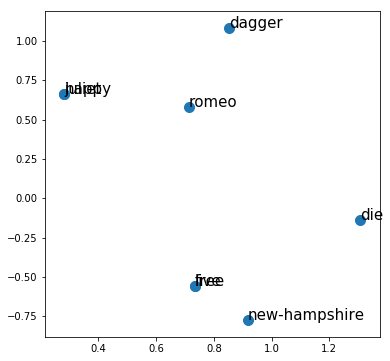

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6, 6)

fig, ax = plt.subplots()

# Scatter
ax.scatter(w_x, w_y, s=100)

# Scatter에 라벨링을 한다.
for i, txt in enumerate(words):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=15)  # free와 live가 겹쳐지는 위치

### 4.2. Document Vectors

In [74]:
doc_eigen_val, doc_eigen_vec = np.linalg.eig(np.dot(A, A.T))

In [75]:
# Doc-Doc matrix의 eigenvectors
doc_eigen_vec

array([[ 0.1420201 ,  0.15926724,  0.44478434, -0.7504044 ,  0.43991404],
       [ 0.28217347,  0.66423004, -0.6686015 , -0.17176556,  0.05143154],
       [ 0.57186359,  0.41900149,  0.53419662,  0.44550631, -0.11648122],
       [ 0.73476714, -0.55918788, -0.20299317, -0.23333456, -0.22754103],
       [ 0.18247656, -0.21255368, -0.16901676,  0.39302536,  0.85935303]])

In [76]:
# Word-Word matrix의 eigenvalue의 root
np.sqrt(doc_eigen_val)

array([2.24201659, 1.90546787, 1.48358481, 0.63742584, 0.85744867])

In [77]:
# Singular value
sig

array([2.24201659, 1.90546787, 1.48358481, 0.85744867, 0.63742584])

In [80]:
# Sigular value가 weight로 사용된 doc vector
doc_vec = np.dot(doc_eigen_vec[:, :2], np.diag(sig[:2]))

In [81]:
doc_vec

array([[ 0.31841142,  0.3034786 ],
       [ 0.63263761,  1.26566901],
       [ 1.28212767,  0.79839387],
       [ 1.64736012, -1.06551453],
       [ 0.40911549, -0.40501421]])

In [82]:
doc_x = doc_vec[:, 0]
doc_y = doc_vec[:, 1]

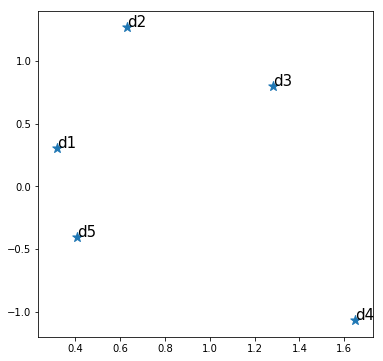

In [84]:
mpl.rcParams['figure.figsize'] = (6, 6)

fig, ax = plt.subplots()

# Scatter
ax.scatter(doc_x, doc_y, marker='*', s=100)

# Scatter에 라벨링을 한다.
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5']):
    ax.annotate(txt, (doc_x[i], doc_y[i]), fontsize=15)

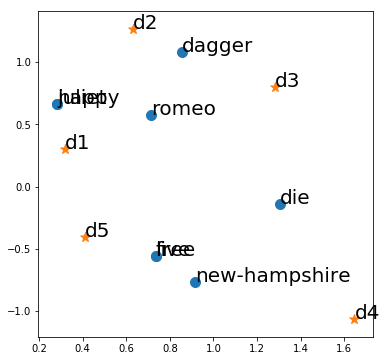

In [85]:
fig, ax = plt.subplots()
ax.scatter(w_x, w_y, s=100)
for i, txt in enumerate(words):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=20)
    
ax.scatter(doc_x, doc_y, marker='*', s=100)
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5']):
    ax.annotate(txt, (doc_x[i], doc_y[i]), fontsize=20)

## 5. Query, document distance 구하기

### 5.1. Query

In [91]:
# Query : die, dagger
q1 = word_vec[:, 3]
print('dagger', q1)

q2 = word_vec[:, 5]
print('die', q2)

dagger [0.85403707 1.08323153]
die [ 1.30663074 -0.14018639]


In [92]:
query = (q1 + q2) / 2
print('dagger and die :', query)

dagger and die : [1.0803339  0.47152257]


### 5.2. Query와 document의 거리 : Word embedding 공간에서는 cosine similarity를 사용
$$\text{Cosine Similarity} = \frac{d_i q}{|d_i| |q|}$$

In [96]:
def get_consine_similarity(doc, query):
    dot_prod = np.dot(doc, query)
    len_doc = np.sqrt(sum(doc ** 2))
    len_query = np.sqrt(sum(query ** 2))
    
    return dot_prod / (len_doc * len_query)

In [97]:
result = {}
for idx, doc in zip(docs, doc_vec):
    result[get_consine_similarity(doc, query)] = idx

In [142]:
result

{0.9394229167549284: 'Romeo and Juliet.',
 0.7675821958223485: 'Juliet: O happy dagger!',
 0.9894460380775614: 'Romeo die by dagger.',
 0.5523126634177865: "'Live free or die', that's the motto of New-Hampshire",
 0.3698973450185458: 'Did you know, New-Hampshire is in New-England'}

### 5.3. 최종 결과

In [140]:
import operator

# 최종결과를 sorting하라!
sorted(result.items(), key=operator.itemgetter(0), reverse=True)


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

Text(1.0803339027046133, 0.4715225705444865, 'query')

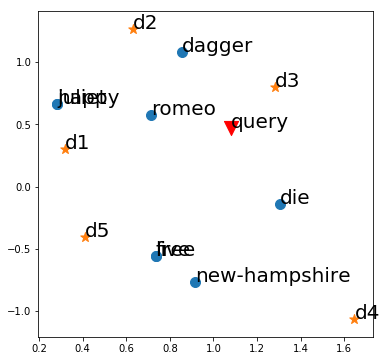

In [111]:
fig, ax = plt.subplots()
ax.scatter(w_x, w_y, s=100)
for i, txt in enumerate(words):
    ax.annotate(txt, (w_x[i], w_y[i]), fontsize=20)
    
ax.scatter(doc_x, doc_y, marker='*', s=100)
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5']):
    ax.annotate(txt, (doc_x[i], doc_y[i]), fontsize=20)
    
ax.scatter(query[0], query[1], marker='v', s=200, color='red')
ax.annotate('query', (query[0], query[1]), fontsize=20)

---
(예제) 다음이 주어졌을 때, word와 document를 2차원으로 그려보고, `python` 과 가까운 단어를 순서대로 나열해보라.

In [86]:
example = [
    "Machine learning is super fun",
    "Python is super, super cool",
    "Statistics is cool, too",
    "Data science is fun",
    "Python is great for machine learning",
    "I like football",
    "Football is great to watch"
]

In [87]:
from collections import OrderedDict
corpus = OrderedDict(
    {
        'cool':0, 
        'data':1,
        'football':2,
        'fun':3,
        'great':4,
        'learning':5,
        'like':6,
        'machine':7,
        'python':8,
        'science':9,
        'statistics':10,
        'super':11,
        'watch':12
    }
)

---

(예제 : 네이버 영화 리뷰 분석)

`inputs/selected_review`의 데이터를 load 하여, 해당 리뷰를 아래와 같이 분석하라.
 - corpus는 리뷰 중 가장 많이 나온 단어 상위 20개를 사용하여 구성하라.
 - `사랑`이라는 단어와 가장 가까운 리뷰를 cosine similarity를 이용하여 상위 10개까지 구하라.
 - `사랑`이라는 단어와 가장 가까운 단어를 cosine similarity를 이용하여 상위 10개까지 구하라.
 - 리뷰 중 가장 많이 나온 단어 상위 20개를 scatter 를 사용하여 plot 하라.

In [1]:
import pandas as pd

In [14]:
# 영화 리뷰를 load한다. 사랑/장르라는 단어를 포함하고 있는 document를 load 한다.
review = pd.read_csv('./inputs/ratings_train.txt', delimiter='\t')

love_review = review[review.document.str.contains('사랑')==True].head(100)
type_review = review[review.document.str.contains('장르')==True].head(100)

df = pd.concat([love_review, type_review], axis=0)

In [17]:
# 형태소 분석기
import konlpy
from konlpy.tag import Komoran

komoran = Komoran()
documents = [komoran.nouns(elem) for elem in df.document.values]

In [24]:
documents[:5]

[['영화', '사랑합니다'],
 ['사랑', '가슴속', '온', '감정', '영화', '예', '요정', '말', '최고'],
 ['년', '영화', '순수', '사랑', '감동', '숀펜', '연기'],
 ['사랑비', '서주', '초', '절대', '후회', '도안', '할거'],
 ['넘', '사랑', '영화', '보고', '넘']]

In [27]:
import pickle

# 데이터를 파일로 저장하기
with open('./inputs/selected_reviews', 'wb') as handle:
    pickle.dump(documents, handle)

In [29]:
# 데이터 불러오기
with open('./inputs/selected_reviews', 'rb') as handle:
    loaded_doc = pickle.load(handle)

---